# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [2]:
renda = pd.read_csv("previsao_de_renda.csv")

renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

/Users/joicealves/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


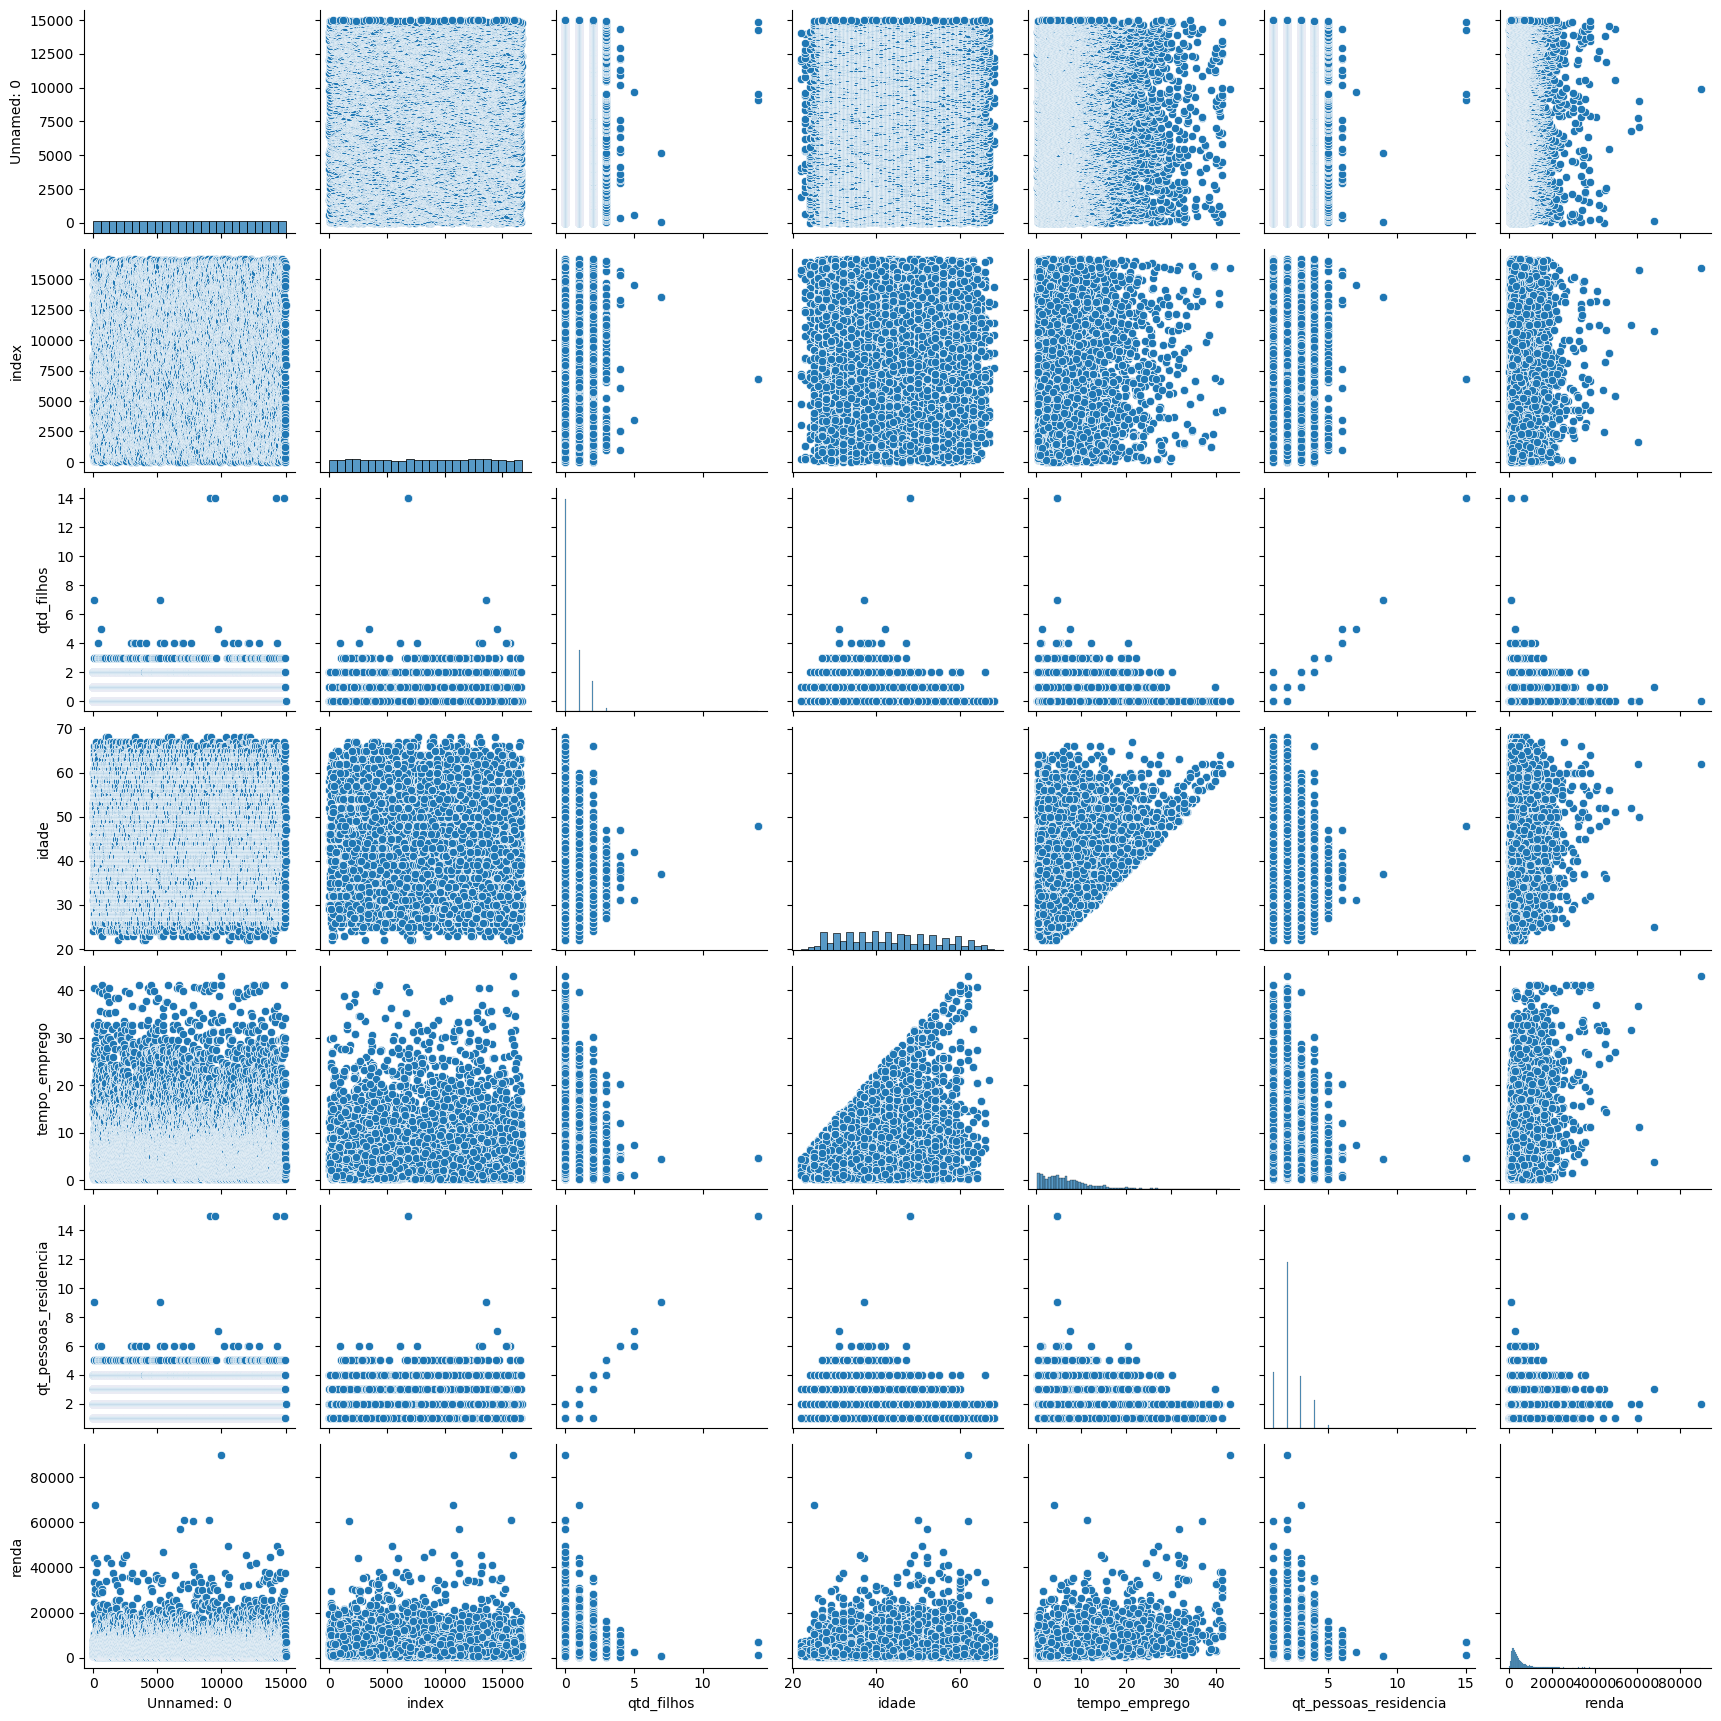

In [12]:
sns.pairplot(renda_numerica)

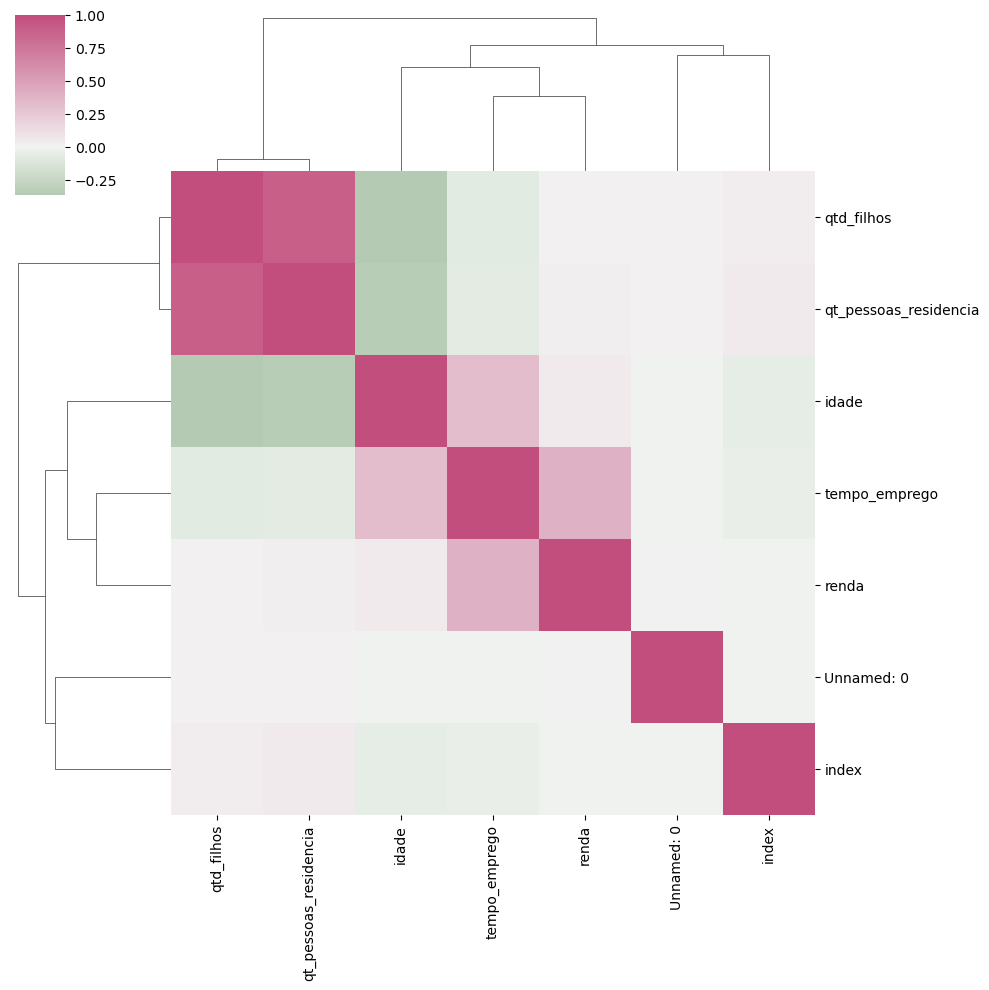

In [10]:
renda_numerica = renda.select_dtypes(include=['number'])

sns.clustermap(renda_numerica.corr(), figsize=(10, 10), center=0, cmap=cmap)

A primeira e maior correlação é facilmente explicada: quanto mais filhos, mais pessoas em uma casa.

Depois vemos uma relação entre idade e tempo de emprego, que é diretamente proporcional.

Ainda, uma relação diretamente proporcional entre tempo de emprego e renda.

Quanto maior idade, em geral, maior tempo de emprego e maior renda. Embora a relação entre idade e renda não seja tão direta.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='idade'>

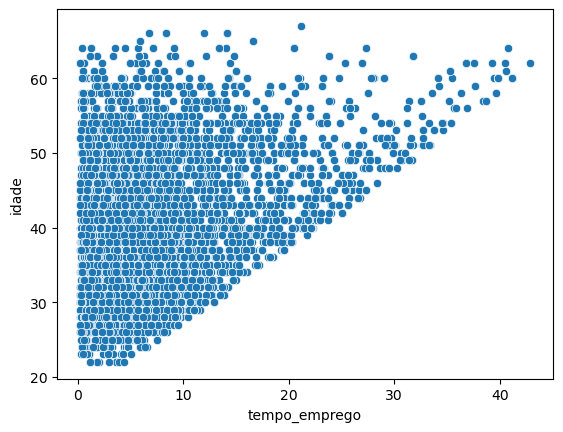

In [21]:
sns.scatterplot(data = renda, x ="tempo_emprego", y = "idade")

Com até 5 anos(fazendo uma aproximação "no olho") existem pessoas de todas as idades. Para valores superiores à 5 anos de emprego, há claramente uma reta, ou seja, uma relação diretamente proporcional entre as variáveis.

3) Na su aopinião, há outliers na variável renda?

<Axes: xlabel='tempo_emprego', ylabel='renda'>

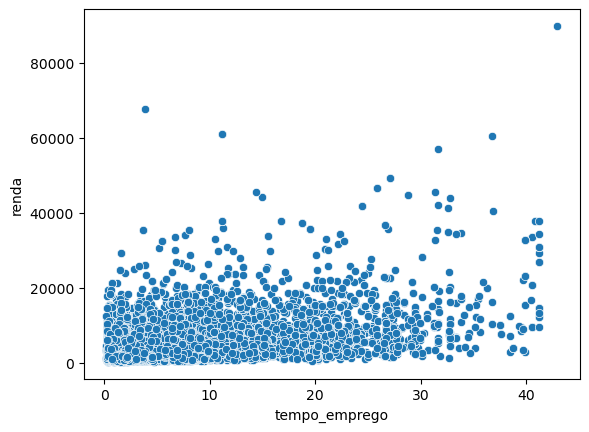

In [24]:
sns.scatterplot(data = renda, x ="tempo_emprego", y = "renda")

<Axes: xlabel='idade', ylabel='renda'>

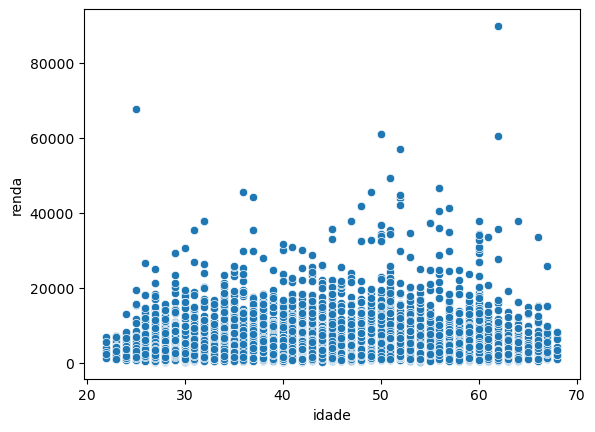

In [26]:
sns.scatterplot(data = renda, x ="idade", y = "renda")

Sim, há pessoas com rendas muito maiores que as demais, especialmente chama a atenção 1 ponto acima dos 40 anos de emprego que a renda sobe muito.

O mesmo acontece com a idade, é a mesma pessoa, pois tem a mesma renda. Tem também 1 ponto com pouca idade que também "estoura".

4) Calcule o logaritmo da variável renda e repita a sequência de análise

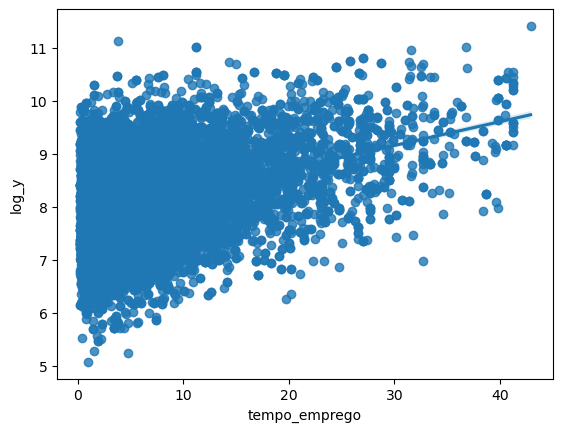

In [30]:
renda_log = renda.copy()
renda_log['log_y'] = np.log(renda_log['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y', data = renda_log)

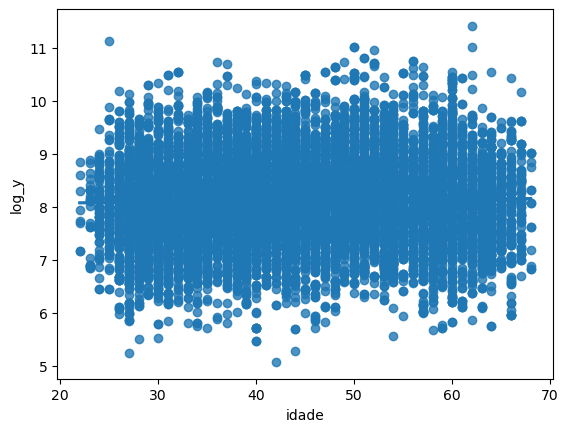

In [31]:
renda_log = renda.copy()
renda_log['log_y'] = np.log(renda_log['renda'])

_ = sns.regplot(x='idade', y='log_y', data = renda_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Nesse caso entendo que piorou.